## Generating Training and Test Data based on Flame Data

In [9]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib
from matplotlib                           import pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

In [10]:
OutputDir  = WORKSPACE_PATH+'/ROMNet/Data/FlameData_Noisy/'
TestDir    = WORKSPACE_PATH+'/ROMNet/Data/FlameData_Noisy_Test/'
try:
    os.makedirs(OutputDir)
except OSError as e:
    pass
try:
    os.makedirs(TestDir)
except OSError as e:
    pass

train_size = 32
test_size  = 64
noise      = 1.0

In [11]:
def f(y, sigma):
    epsilon = np.random.randn(*y.shape) * sigma
    return y + epsilon

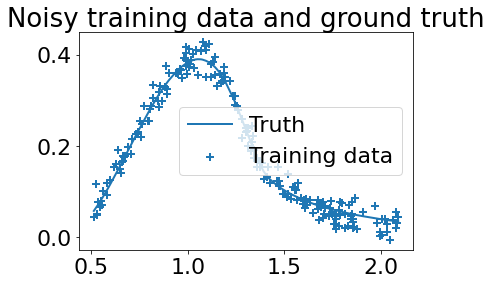

In [12]:
Data    = pd.read_csv("./FlameData.csv", delim_whitespace=True, header=None)
X       = Data.to_numpy()[:,0]
Y       = Data.to_numpy()[:,1]
x_sort  = np.argsort(X)
X       = X[x_sort]
y_true  = Y[x_sort]
y       = f(y_true,0.02)

X_train      = X_test = X
y_train      = y_test = y
y_train_true = y_true

plt.scatter(X_train, y_train, marker='+', label='Training data')
plt.plot(X_train, y_train_true, label='Truth')
plt.title('Noisy training data and ground truth')
plt.legend();

In [13]:
### Saving Data

Header   = 'x'
FileName = OutputDir+'/Input.csv'
np.savetxt(FileName, X_train, delimiter=',', header=Header, comments='')
        
Header   = 'y'
FileName = OutputDir+'/Output.csv'
np.savetxt(FileName, y_train, delimiter=',', header=Header, comments='')


Header   = 'x'
FileName = TestDir+'/Input.csv'
np.savetxt(FileName, X_test, delimiter=',', header=Header, comments='')
        
Header   = 'y'
FileName = TestDir+'/Output.csv'
np.savetxt(FileName, y_test, delimiter=',', header=Header, comments='')